<a href="https://colab.research.google.com/github/Yamana06/NYC-Taxi-Trip-Duration/blob/main/NYC_Taxi_Trip_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries
First we will import all the necessary libraries needed for analysis and visualization.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


<b>Now that we have all the necessary libraries lets load the data set. We will load it into the pandas DataFrame df.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project-1/NYC Taxi Data.csv")

<b>We read the dataset into the DataFrame df and will have a look at the shape , columns , column data types and the first 5 rows of the data. This will give a brief overview of the data at hand.

In [ ]:
df.shape # This returns the number of rows and columns


(1458644, 11)

In [ ]:
df.columns # This returns the column names

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#### Here’s what we know about the columns:<br>

<b>Demographic information of Customer & Vendor:<br>
- id : a unique identifier for each trip<br>
- vendor_id : a code indicating the provider associated with the trip record<br>
- passenger_count : the number of passengers in the vehicle (driver entered value)<br>

<b>Information about the Trip:<br>
- pickup_longitude : date and time when the meter was engaged<br>
- pickup_latitude : date and time when the meter was disengaged<br>
- dropoff_longitude : the longitude where the meter was disengaged<br>
- dropoff_latitude : the latitude where the meter was disengaged<br>
- store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)<br>
- trip_duration : (target) duration of the trip in seconds<br>
<br>
- <b>Thus we have a data set with 1458644 rows and 11 columns. There are 10 features and 1 target variable which is trip_duration

In [ ]:
df.dtypes #This returns the data type of the columns

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
df.head() #This returns the first 5 rows of the Data set

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


- Thus we get a glimpse of the data set by looking at the first 5 rows returned by df.head(). Optionally we can specify the number of rows to be returned, by sending it as a parameter to the head() function.

<b>Some observations about the data:<br>
- The columns id and vendor_id are nominal.<br>
- The columns pickup_datetime and dropoff_datetime are stored as object which must be converted to datetime for better analysis.<br>
- The column store_and_fwd_flag is categorical<br>

<b>Lets look at the numerical columns :

In [ ]:
print(df.count())

id                    1458644
vendor_id             1458644
pickup_datetime       1458644
dropoff_datetime      1458644
passenger_count       1458644
pickup_longitude      1458644
pickup_latitude       1458644
dropoff_longitude     1458644
dropoff_latitude      1458644
store_and_fwd_flag    1458644
trip_duration         1458644
dtype: int64


In [ ]:
df.describe().apply(lambda s:s.apply('{0:.2f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


In [ ]:
df.describe() # This returns a statistical summary of the numerical columns

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<b>The returned table gives certain insights:<br>
- There are no numerical columns with missing data
- The passenger count varies between 1 and 9 with most people number of people being 1 or 2
- The trip duration varying from 1s to 3526282s~ 979 hrs. There are definitely some outliers present which must be treated.
  

<b>Lets have a quick look at the non-numerical columns:


In [ ]:
df.describe(include=object)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


In [ ]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count()) # The count of the specified columns are returned

id                    1458644
pickup_datetime       1458644
dropoff_datetime      1458644
store_and_fwd_flag    1458644
dtype: int64


- There are no missing values for the non numeric columns as well.

- The 2 columns pickup_datetime and dropoff_datetime are now converted to datetime format which makes analysis of date and time data much more easier.

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

# Univariate Analysis

Lets have a look at the distribution of various variables in the Data set.

## Passenger Count

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


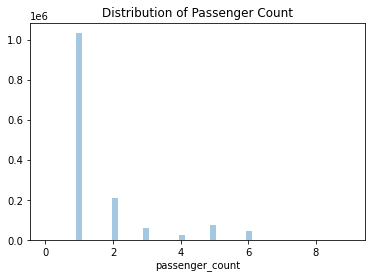

In [ ]:
# A histogram of the #of passengers in each trip
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()


Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

<b>The distribution of Pickup and Drop Off day of the week

In [ ]:
print(df['pickup_datetime'].nunique())
print(df['dropoff_datetime'].nunique())

1380222
1380377


- The returned values are 1380222 and 1380377. This shows that there are many different pickup and drop off dates in these 2 columns.


<b>So its better to convert these dates into days of the week so a pattern can be found.


In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

<b>Now lets look at the distribution of the different days of week

In [ ]:
df['pickup_day'].value_counts() # A frequency distribution of the different pickup days.

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [ ]:
df['dropoff_day'].value_counts() # A frequency distribution of the different dropoff days.

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

<b>Thus we see most trips were taken on Friday and Monday being the least. The distribution of trip duration with the days of the week is something to look into as well.

## The distribution of days of the week can be seen graphically as well.

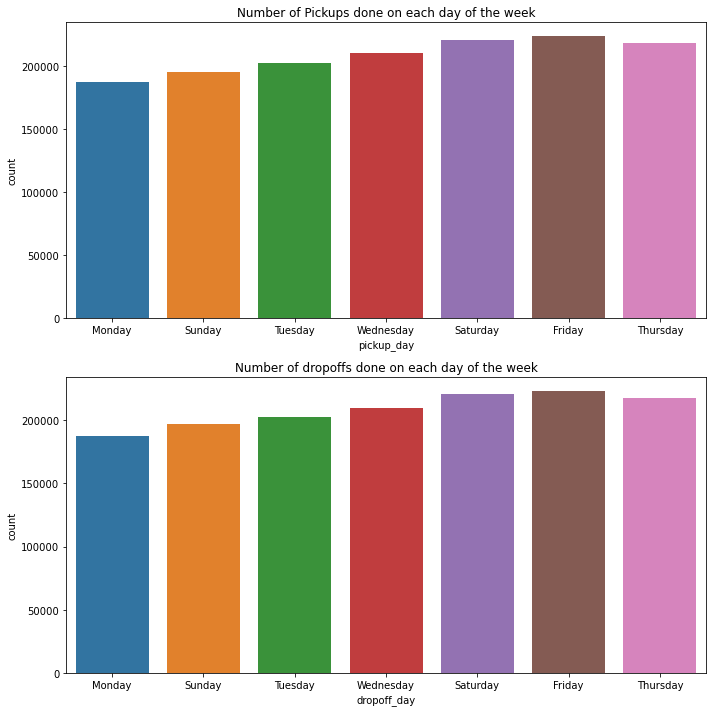

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

## The distribution of Pickup and Drop Off hours of the day

The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones: morning (4 hrs to 10 hrs) , midday (10 hrs to 16 hrs) , evening (16 hrs to 22 hrs) and late night (22 hrs to 4 hrs)

In [ ]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

### Lets look at the distribution of the timezones

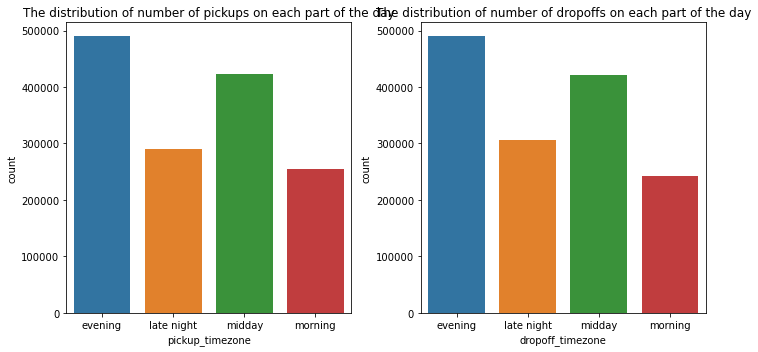

In [ ]:
# The distribution of # of pickups and drop offs done on each part of the da
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

<b>Thus we observe that most pickups and drops occur in the evening. While the least drops and pickups occur during morning.

Lets have another column depicting the hour of the day when the pickup was done.

Text(0.5, 1.0, 'Distribution of dropoff hours')

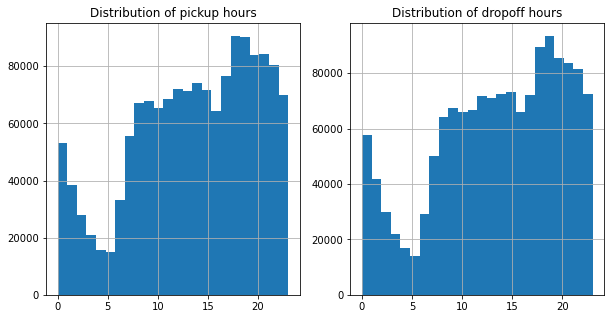

In [ ]:
# The distribution of # of pickups and drop offs done on each hour of the day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

<b>The 2 distributions are almost similar and are also aligned with the division of the hours of the day into 4 parts and their distribution done previously.

# Distribution of the stored and forward flag

In [ ]:
df['store_and_fwd_flag'].value_counts() #The returned frequency distribution of the Yes/No Flag

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

<b>The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.

# Distribution of the trip duration

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

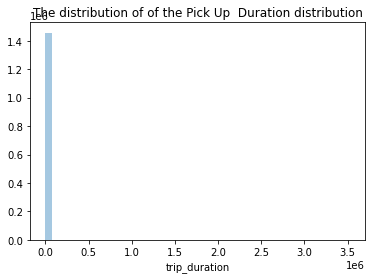

In [ ]:
# The distribution of the trip duration in seconds
sns.distplot(df['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

<b>This histogram shows extreme right skewness, hence there are outliers. Lets see the boxplot of this variable.

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

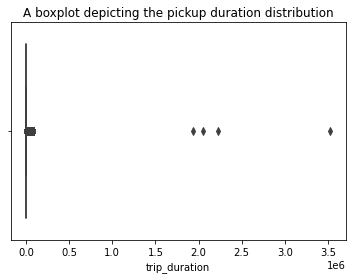

In [ ]:
# The box plot of trip_duration
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

Thus we see there is only value near 2000000 while all the others are somewhere between 0 and 100000. The one near 2000000 is definitely an outlier which must be treated.

<b>Lets have a look at the 10 largest value of trip_duration.

In [ ]:
# The returned 10 largest value in the column
print( df['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


The largest value is much greater than the 2nd and 3rd largest trip duration value. This might be because of some errors which typically occurs during data collection or this might be a legit data. Since the occurrence of such a huge value is unlikely so its better to drop this row before further analysis.

<b>The value can be replaced by the mode or median of trip duration as well.

In [ ]:
df=df[df.trip_duration!=df.trip_duration.max()]

### Lets have a look at the distribution of the trip_duration after we have dropped the outlier.

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

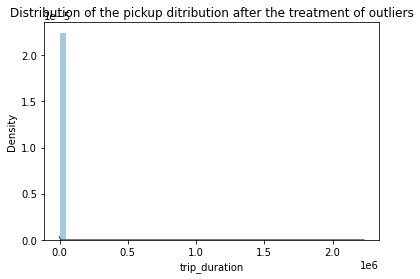

In [ ]:
#The distribution of the trip duration in seconds after removing the outlier
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

### Still there is an extreme right skewness. Thus we will divide the trip_duration column into some interval.
<b>The intervals are decided as follows:
- less than 5 hours
- 5–10 hours
- 10–15 hours
- 15–20 hours
- more than 20 hours

In [ ]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

# Distribution of pickup longitude

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Pick up Longitude')

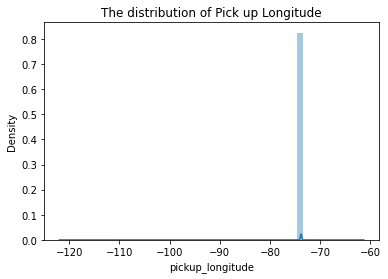

In [ ]:
#The distribution of pick up longitude
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

# Distribution of drop off longitude

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Drop off Longitude')

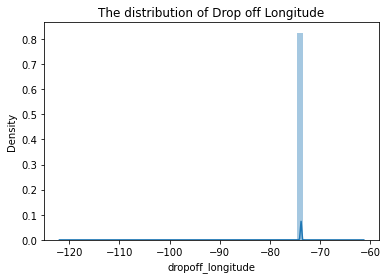

In [ ]:
# The distribution of drop off longitude
sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

# Distribution of dropoff latitude

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of drop off Latitude')

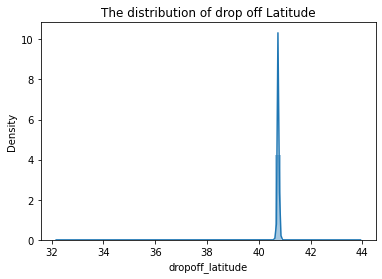

In [ ]:
# The distribution of drop off latitude
sns.distplot(df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

# Distribution of pickup latitude

C:\Users\yaman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of pick up Latitude')

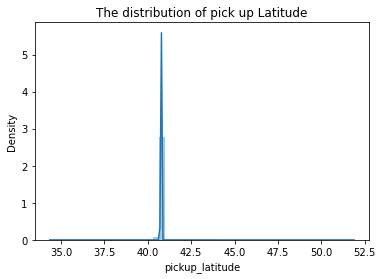

In [ ]:
# The distribution of pickup latitude
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

We see that the pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup latitude and the dropoff latitude has slightly different distribution.

# Distribution of vendor_id

<AxesSubplot:>

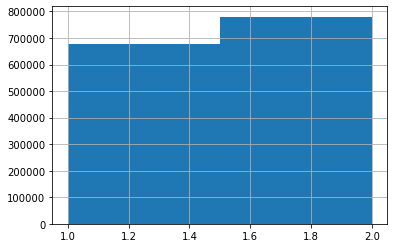

In [ ]:
df['vendor_id'].hist(bins=2)

The distribution of vendor id is not much different as expected.